In [1]:
# Imports libraries 
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import os
import mediapy as media
from tqdm import tqdm
import mujoco_viewer

# Robotics toolbox and dependencies
import roboticstoolbox as rtb
import spatialmath as sm
from spatialmath import UnitQuaternion, SE3
from spatialmath.base import q2r, r2x, rotx, roty, rotz, r2q, q2r
from mujoco_parser import MuJoCoParserClass


from Ur5e import Ur5e
from actuator import ActuatorMotor, update_actuator
from quaternion_helper import *

In [2]:
# Make ur5e instance
if 'ur5e' in locals():
    print('ur5e already exists')
    del ur5e

try:
    ur5e
except NameError:
    print('ur5e does not exist')
    ur5e = Ur5e()

ur5e does not exist


In [3]:
# Make actuator instance torque controlled
try:
    actuator
except NameError:
    actuator = ActuatorMotor()

forces_ctrl_range = np.array([[-150, 150], [-150, 150], [-150, 150], [-28, 28], [-28, 28], [-28, 28]])

for actuator_id in range(ur5e.m.nu):
    update_actuator(ur5e.m, actuator_id, actuator, ctrlrange=forces_ctrl_range[actuator_id])

In [4]:
# Visualize mujoco, Show initial state of the scene

# Use forward dynamics to get the initial state of the data
mujoco.mj_forward(ur5e.m, ur5e.d)
# render the initial state
if 'renderer' in locals():
    print('renderer already exists')
    del renderer


try:
    renderer
except NameError:
    renderer = mujoco.Renderer(ur5e.m, 480, 640)


#renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
#media.show_image(renderer.render())

# Trajectory

In [5]:
poi = np.array([
    #[93, 243],
    [500, 550],
    [130, 243],
    [130, 223],
    [175, 223],
    [175, 263],
    [130, 263],
    [130, 223],
    [175, 223],
    [175, 243],
    [213, 243],
    [213, 223],
    [254, 223],
    [254, 164],
    [334, 164],
    [334, 144],
    [379, 144],
    [379, 184],
    [334, 184],
    [334, 144],
    
])

poi = poi + np.array([0, -281])

#print(poi)
#plt.plot(poi[:, 0], poi[:, 1])
#plt.show()

'''
    [379, 144],
    [379, 164],
    [663, 164],
    [663, 271],
    [648, 271],
    [648, 289],
    [663, 289],
    [663, 392],
    [379, 392],
    [379, 372],
    [334, 372],
    [334, 412],
    [379, 412],
    [379, 372],
    [334, 372],
    [334, 392],
    [254, 392],
    [254, 339],
    [213, 339],
    [213, 319],
    [175, 319],
    [175, 339],
    [130, 339],
    [130, 319],
    [93, 319],
    [130, 319],
    [130, 299],
    [175, 299],
    [175, 319],
    [213, 319],
    [213, 299],
    [297, 299],
    [297, 339],
    [213, 339],
    [213, 299],
    [297, 299],
    [297, 319],
    [334, 319],
    [334, 299],
    [379, 299],
    [379, 339],
    [334, 339],
    [334, 299],
    [379, 299],
    [379, 319],
    [435, 319],
    [435, 292],
    [444, 281],
    [480, 281],
    [480, 261],
    [525, 261],
    [525, 281],
    [565, 281],
    [565, 301],
    [648, 301],
    [648, 261],
    [565, 261],
    [565, 281],
    [525, 281],
    [525, 301],
    [480, 301],
    [480, 281],
    [444, 281],
    [435, 272],
    [425, 281],
    [435, 292],
    [444, 281],
    [435, 272],
    [435, 243],
    [379, 243],
    [379, 263],
    [334, 263],
    [334, 243],
    [297, 243],
    [297, 263],
    [213, 263],
    [213, 223],
    [297, 223],
    [297, 243],
    [334, 243],
    [334, 223],
    [379, 223],
    [379, 243]
    '''

'\n    [379, 144],\n    [379, 164],\n    [663, 164],\n    [663, 271],\n    [648, 271],\n    [648, 289],\n    [663, 289],\n    [663, 392],\n    [379, 392],\n    [379, 372],\n    [334, 372],\n    [334, 412],\n    [379, 412],\n    [379, 372],\n    [334, 372],\n    [334, 392],\n    [254, 392],\n    [254, 339],\n    [213, 339],\n    [213, 319],\n    [175, 319],\n    [175, 339],\n    [130, 339],\n    [130, 319],\n    [93, 319],\n    [130, 319],\n    [130, 299],\n    [175, 299],\n    [175, 319],\n    [213, 319],\n    [213, 299],\n    [297, 299],\n    [297, 339],\n    [213, 339],\n    [213, 299],\n    [297, 299],\n    [297, 319],\n    [334, 319],\n    [334, 299],\n    [379, 299],\n    [379, 339],\n    [334, 339],\n    [334, 299],\n    [379, 299],\n    [379, 319],\n    [435, 319],\n    [435, 292],\n    [444, 281],\n    [480, 281],\n    [480, 261],\n    [525, 261],\n    [525, 281],\n    [565, 281],\n    [565, 301],\n    [648, 301],\n    [648, 261],\n    [565, 261],\n    [565, 281],\n    [525, 28

In [6]:
# Generate trajectory

#startpos = np.array([0, 0, 0])
T0 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0]) # sm.SE3.Trans(0.5, 0, 0.3) * sm.SE3.RPY([0, np.pi, 0]) changed z from 0.3 to 0.4 to avoid collision
T1 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0])
dt = 0.002 
endTime = 0.3
n = int(endTime/dt)

if 'ctr' not in locals():
    ctr = np.array([])
    times = np.array([])
    startTime = 0
    scalingX = 5000
    scalingY = 2500
    movementX = 0.4
    movementY = 0.0



    for i in tqdm(range(0, poi.shape[0]-1)):
        distance = np.sqrt((poi[i+1, 0] - poi[i, 0])**2 + (poi[i+1, 1] - poi[i, 1])**2)
        endTime = distance*0.05
        n = int(endTime/dt)
        T0.t[0] = movementX + poi[i, 0]/scalingX
        T0.t[1] = movementY + poi[i, 1]/scalingY
        T1.t[0] = movementX + poi[i+1, 0]/scalingX
        T1.t[1] = movementY + poi[i+1, 1]/scalingY
        trajectory = rtb.ctraj(T0, T1, n)
        time = np.linspace(startTime, startTime+endTime, n)
        startTime = startTime+endTime
        if i == 0:
            ctr = trajectory
            times = time
        else:
            x = ctr.Alloc(len(ctr)+len(trajectory))
            for j in range(0, len(ctr)):
                x[j] = ctr[j]
            for j in range(0, len(trajectory)):
                x[j+len(ctr)] = trajectory[j]
            ctr = x
            times = np.append(times, time)



    #differentiate to find velocity
    velocityX = np.gradient(ctr.t[:,0])
    velocityY = np.gradient(ctr.t[:,1])
    velocityZ = np.gradient(ctr.t[:,2])

    velocity = np.transpose(np.array([velocityX, velocityY, velocityZ]))

    #differentiate to find acceleration
    accelerationX  = np.gradient(velocityX)
    accelerationY  = np.gradient(velocityY)
    accelerationZ  = np.gradient(velocityZ)

    acceleration = np.transpose(np.array([accelerationX, accelerationY, accelerationZ]))        
    print(f"No of points in trajectory: {len(ctr)}") 


  0%|          | 0/18 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:03<00:00,  5.31it/s]


No of points in trajectory: 29094


[ 0.46290576 -1.63627728 -1.85986847 -1.21624315  1.57079641  2.03370209]



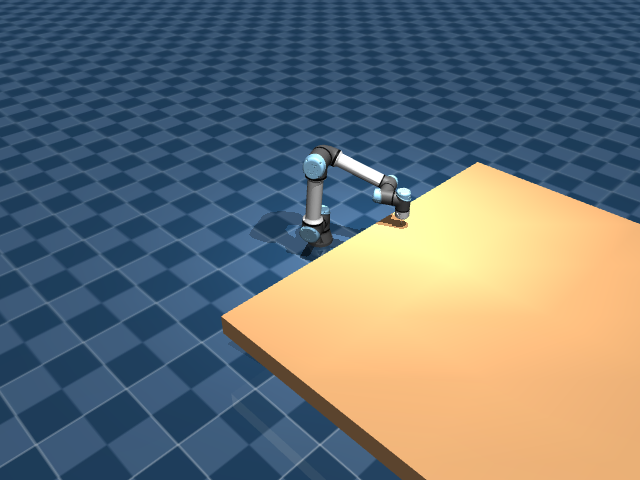

In [10]:
# Use the inverse kinematics to make a start pose for the robot
sol = ur5e.invkin(ctr[0])
print(sol.q)
# visualize the position
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)
renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
media.show_image(renderer.render())
# joints pose
#[ 0.46362935 -1.63647675 -1.8596509  -1.2162613   1.57079635  2.03442568] # CBF

In [8]:
import numpy as np
from cvxopt import matrix, solvers

solvers.options['show_progress'] = False

tau_nom = np.array([0.5, -10.0, 5.0, -5.0])

MIN_TORQUE = np.array([-1.0, -40.0, -40.0, -40.0])
MAX_TORQUE = np.array([0.3, -34.0, -34.0, -34.0])

#    minimize   0.5 * ||tau - tau_nom||^2
#    subject to  MIN_TORQUE <= tau <= MAX_TORQUE.

P = matrix(np.eye(4))          # quadratic cost
q_vec = matrix(-tau_nom)        # linear cost: -tau_nom

G = matrix(np.vstack((np.eye(4), -np.eye(4))))
h_vec = matrix(np.hstack((MAX_TORQUE, -MIN_TORQUE)))

# Solve the QP
sol_qp_test = solvers.qp(P, q_vec, G, h_vec)
tau_safe = np.array(sol_qp_test['x']).flatten()

print("Nominal torque:", tau_nom)
print("Safe torque (after projection):", tau_safe)


Nominal torque: [  0.5 -10.    5.   -5. ]
Safe torque (after projection): [  0.29870214 -34.0000001  -34.00000006 -34.00000008]


# Admittance Controller
More like an impedance controller, doesnt follow a trajectory but complies with environment

In [9]:
import numpy as np
import mujoco
from tqdm import tqdm
'''
M_diag = np.array([5.0, 5.0, 5.0, 5.0, 5.0, 5.0])  # Reduce mass in Z for faster descent
D_diag = np.array([50, 50, 50, 10, 10, 10])  # Reduce damping for less resistance
K_diag = np.array([0, 0, 0, 0, 0, 0])  # Stiffness matrix 0 = full admittance

M = np.diag(M_diag)
D = np.diag(D_diag)
K = np.diag(K_diag)
'''
M_diag = np.array([200.0, 200.0, 200.0, 15.0, 15.0, 15.0])  # [m_x, m_y, m_z, m_roll, m_pitch, m_yaw]
M = np.diag(M_diag)
K_trans = 1000.0
K_rot = 15.0
# For a critically damped second-order system (ζ = 1):
omega_n = np.sqrt(K_trans / M_diag[0])  # Natural frequency (rad/s)
# For translation (first 3 components):
#K_trans = M_diag[0]       
D_trans = 2 * M_diag[0] * omega_n         # e.g. 2*50*1 = 100
# For rotation (last 3 components): (keeping orientation constant)
K_rot = K_rot         # e.g. 12*1 = 12
D_rot = 2 * M_diag[3] * omega_n           # e.g. 2*12*1 = 24

# Assemble effective gain matrices (6x6 diagonal)
K = np.diag([K_trans, K_trans, K_trans, K_rot, K_rot, K_rot])
D = np.diag([D_trans, D_trans, D_trans, D_rot, D_rot, D_rot])
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

x_e = np.zeros(6)  # Pos error
v_e = np.zeros(6)  # Vel error
v_e_last = np.zeros(6)  # Previous velocity

showVideo = True
duration = 5
framerate = 30  
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))

frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 3))
torques = np.zeros((n_steps, 6))
target_positions_as_quat = np.zeros((n_steps, 7))
target_positions = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
contact_points = []
contact_forces = []
time_log = []
force_log = []  
vel_log = np.zeros((n_steps, 6))


#sol = np.array([0.27174445, -1.40474226, -2.07800756, -1.2296391, 1.57079635, 1.84254078])
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
#sol.qvel[:] = 0.0
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # cartesian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)
    vel_log[idx, :] = ur5e.d.qvel.copy()
    # At end effector
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    #f_ext[2] = -0.05  # gravity
    
    f_ext *= compliance_vector # Hvis compliance frame skal bruges skal den ændres 
    
    # Admittance - acc in Cartesian Space
    acc_e = np.linalg.inv(M) @ (f_ext - K @ x_e - D @ v_e)
    # integrate vel and pos err
    v_e = (stepsize * 0.5) * (acc_e + v_e_last) + v_e_last
    x_e = (stepsize * 0.5) * (v_e + v_e_last) + x_e
    v_e_last = v_e.copy()
    
    acc_joint = np.linalg.pinv(J) @ (acc_e - dJ @ ur5e.d.qvel) # joint space
    
    # get torque using inverse dynamics
    prev_qacc = ur5e.d.qacc.copy()
    ur5e.d.qacc[:] = acc_joint
    mujoco.mj_inverse(ur5e.m, ur5e.d)
    torque_cmd = ur5e.d.qfrc_inverse.copy()
    ur5e.d.qacc[:] = prev_qacc
    
    # Apply torque control
    ur5e.d.ctrl[:] = torque_cmd
    
    quat_e = r2q(tcp_pos.R)
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate([tcp_pos.t, tcp_pos.rpy(order='xyz')])
    velocities[idx] = v_e
    forces[idx] = f_ext[:3]
    torques[idx] = torque_cmd
    target_positions_as_quat[idx] = positions_as_quat[idx]
    target_positions[idx] = positions_as_rpy[idx]
    target_velocities[idx] = velocities[idx]
    time_log.append(ur5e.d.time)
    force_log.append(f_ext[:3])
    
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

if showVideo:
    media.show_video(frames, fps=framerate)


  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1.0020000000000007/5 [00:01<00:07,  1.78s/it]  

KeyboardInterrupt: 

# Plots

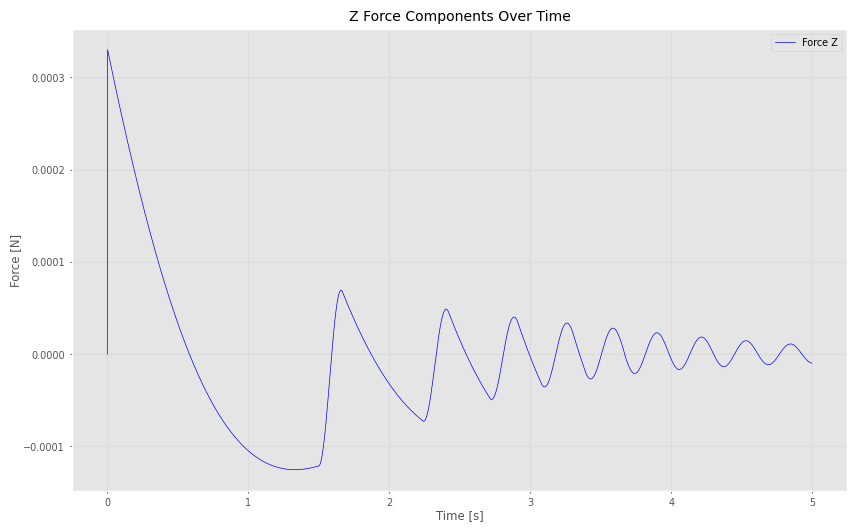

"\nplt.figure(figsize=(10, 6))\nplt.plot(time_log, force_magnitude, label='Force Magnitude', color='k')\nplt.xlabel('Time [s]')\nplt.ylabel('Force Magnitude [N]')\nplt.title('Contact Force Magnitude Over Time')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [ ]:
# Convert logs to NumPy arrays
time_log = np.array(time_log)          # shape: (n_steps,)
force_log = np.array(force_log)        # shape: (n_steps, 3)

# Optionally, compute the overall magnitude of the force vector at each step
force_magnitude = np.linalg.norm(force_log, axis=1)
plt.figure(figsize=(10, 6))
#plt.plot(time_log, force_log[:, 0], label='Force X', color='r')
#plt.plot(time_log, force_log[:, 1], label='Force Y', color='g')
plt.plot(time_log, vel_log[:, 1], label='Force Z', color='b')
plt.xlabel('Time [s]')
plt.ylabel('Force [N]')
plt.title('Z Force Components Over Time')
plt.legend()
plt.grid(True)
plt.show()
'''
plt.figure(figsize=(10, 6))
plt.plot(time_log, force_magnitude, label='Force Magnitude', color='k')
plt.xlabel('Time [s]')
plt.ylabel('Force Magnitude [N]')
plt.title('Contact Force Magnitude Over Time')
plt.legend()
plt.grid(True)
plt.show()
'''

# Torque plots

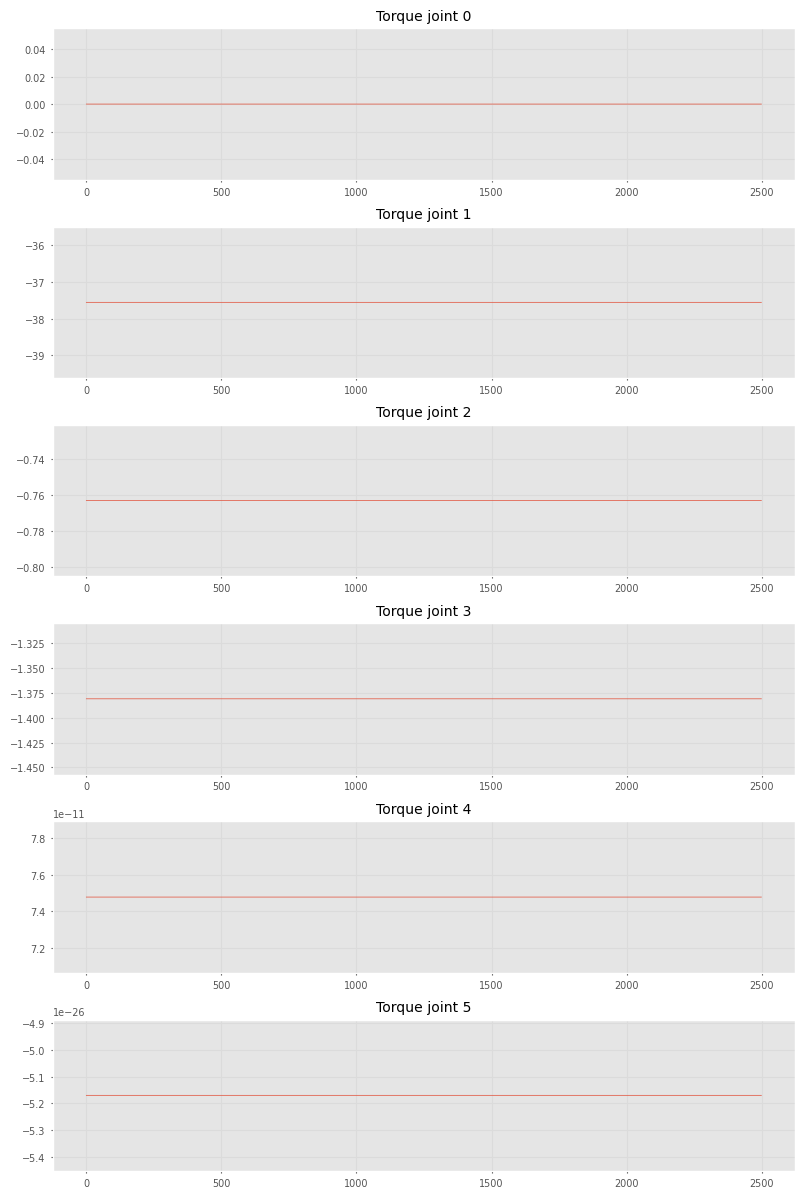

In [ ]:

fig, axs = plt.subplots(6, 1, figsize=(8, 12))

axs[0].plot(torques[:,0])
axs[0].set_title('Torque joint 0')

axs[1].plot(torques[:,1])
axs[1].set_title('Torque joint 1')

axs[2].plot(torques[:,2])
axs[2].set_title('Torque joint 2')

axs[3].plot(torques[:,3])
axs[3].set_title('Torque joint 3')

axs[4].plot(torques[:,4])
axs[4].set_title('Torque joint 4')

axs[5].plot(torques[:,5])
axs[5].set_title('Torque joint 5')

plt.tight_layout()
plt.show()



# Traditional ECBF with q_min,max + L_f h(x), L_g h(x) and lambda
Pole placement

In [ ]:
import numpy as np
import mujoco
from cvxopt import matrix, solvers
from tqdm import tqdm
import matplotlib.pyplot as plt

solvers.options['show_progress'] = False
'''
M_diag = np.array([5.0]*6)
D_diag = np.array([5, 5, 5, 10, 10, 10])
K_diag = np.array([10, 10, 10, 5, 5, 5])
M_cart = np.diag(M_diag)
D_cart = np.diag(D_diag)
K_cart = np.diag(K_diag)
'''
M_diag = np.array([200.0, 200.0, 200.0, 15.0, 15.0, 15.0])  # [m_x, m_y, m_z, m_roll, m_pitch, m_yaw]
M = np.diag(M_diag)
K_trans = 1000.0
K_rot = 15.0
# For a critically damped second-order system (ζ = 1):
omega_n = np.sqrt(K_trans / M_diag[0])  # Natural frequency (rad/s)
# For translation (first 3 components):
#K_trans = M_diag[0]       
D_trans = 2 * M_diag[0] * omega_n         # e.g. 2*50*1 = 100
# For rotation (last 3 components): (keeping orientation constant)
K_rot = K_rot         # e.g. 12*1 = 12
D_rot = 2 * M_diag[3] * omega_n           # e.g. 2*12*1 = 24

# Assemble effective gain matrices (6x6 diagonal)
K = np.diag([K_trans, K_trans, K_trans, K_rot, K_rot, K_rot])
D = np.diag([D_trans, D_trans, D_trans, D_rot, D_rot, D_rot])
# Joint limits in joint space
#q_min = np.full(6, -2*np.pi/2)  # rad
#q_max = np.full(6,  2*np.pi/2)
#q_min = np.array([1.5, 0.0, -1.0, 0.0, 2.0, 3.0]) 
#q_max =  np.array([-1, -2.0, -3.0, -2.0, 1.0, 1.0]) 

# Enforcing ddot{h} + alpha2\dot{h} + alpha1*h >= 0
# Meaning: tau <= alpha1*(q_max - q) + alpha2*q_dot
#          tau >= -alpha1*(q - q_min) - alpha2*q_dot
q_min = np.array([1.5, -1.6, -1.8, -1.15, 2.0, 3.0]) 
q_max =  np.array([-1, -1.7, -1.9, -1.3, 1.0, 1.0])                 
print(q_min)

# --------------------------------------------------------------
# Pole Placement for ECBF Gains: Setup desired safety dynamics
# --------------------------------------------------------------
# Want barrier dynamics of polynomial form: s^2 + 2*zeta*omega_n*s + omega_n^2
# alpha_1 = omega_n^2 and alpha_2 = 2*zeta*omega_n
# We want critically damped system, so zeta = 1

omega_n = 2.0  # Natural frequency rad/s
zeta = 1.0     # Damping ratio - critically damped

# Calculate ECBF gains using the pole placement formulas:
alpha_1 = omega_n ** 2       # α1 = ω_n^2; increases "stiffness" as joint nears limit. - same as lambda²
alpha_2 = 2 * zeta * omega_n # α2 = 2ζω_n; provides the desired damping.               - same as 2*lambda
print(f"α1: {alpha_1}, α2: {alpha_2}")

compliance_vector = np.array([1, 1, 1, 1, 1, 1])
showVideo = True
duration = 3        # seconds
framerate = 30      # Hz
stepsize = ur5e.m.opt.timestep 
n_steps = int(np.ceil(duration / stepsize))

frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 3))
tau_nom_log = np.zeros((n_steps, 6))
tau_cbf_log = np.zeros((n_steps, 6))
h_log = np.zeros((n_steps, 6))       
time_log = []                       
q_log = np.zeros((n_steps, 6))        
q_dot_log = np.zeros((n_steps, 6))     

q_nom_log = np.zeros((n_steps, 6))    
q_dot_nom_log = np.zeros((n_steps, 6))

q_nom = ur5e.d.qpos.copy()
q_dot_nom = ur5e.d.qvel.copy()

x_e = np.zeros(6)   
v_e = np.zeros(6)   
v_e_last = np.zeros(6)

mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)
    q_log[idx, :] = ur5e.d.qpos.copy()
    q_dot_log[idx, :] = ur5e.d.qvel.copy()
    
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    f_ext[2] -= 0.5 # gravity
    f_ext *= compliance_vector
    
    # ẍ = M⁻¹ (f_ext - K*x_e - D*v_e)
    acc_e = np.linalg.inv(M) @ (f_ext - K @ x_e - D @ v_e)
    # integration
    v_e = v_e + stepsize * 0.5 * (acc_e + v_e_last)
    x_e = x_e + stepsize * 0.5 * (v_e + v_e_last)
    v_e_last = v_e.copy()
    
    # map cartesian to joint
    acc_joint = np.linalg.pinv(J) @ (acc_e - dJ @ ur5e.d.qvel)
    
    q_dot_nom += stepsize * acc_joint
    q_nom     += stepsize * q_dot_nom
    q_nom_log[idx, :] = q_nom.copy()
    q_dot_nom_log[idx, :] = q_dot_nom.copy()
    
    prev_qacc = ur5e.d.qacc.copy()
    ur5e.d.qacc[:] = acc_joint
    mujoco.mj_inverse(ur5e.m, ur5e.d)
    tau_nom = ur5e.d.qfrc_inverse.copy()
    ur5e.d.qacc[:] = prev_qacc
    tau_nom_log[idx, :] = tau_nom.copy()
    
    # 6) ECBF
    #   L_f^2 h_upper + L_g L_f h_upper * tau >= -α1 * h_upper - α2 * (L_f h_upper)
    #   L_f^2 h_lower + L_g L_f h_lower * tau >= -α1 * h_lower - α2 * (L_f h_lower)
    #
    #   tau_i <= α1*(q_max[i] - q[i]) + α2*q_dot[i]    (upper)
    #   tau_i >= -α1*(q[i] - q_min[i]) - α2*q_dot[i]    (lower)

    q_current = ur5e.d.qpos.copy()
    q_dot_current = ur5e.d.qvel.copy()

    tau_upper_ecbf = alpha_1 * (q_max - q_current) + alpha_2 * q_dot_current
    tau_lower_ecbf = -alpha_1 * (q_current - q_min) - alpha_2 * q_dot_current

    # Use only joint position based bounds
    tau_upper_bound = tau_upper_ecbf
    tau_lower_bound = tau_lower_ecbf

    # QP: minimize 0.5*||tau - tau_nom||^2 subject to tau_lower_bound <= tau <= tau_upper_bound
    P_qp = matrix(np.eye(6))
    q_vec = matrix(-tau_nom)
    G_qp = matrix(np.vstack(( np.eye(6), -np.eye(6) )))
    h_qp = matrix(np.hstack(( tau_upper_bound, -tau_lower_bound )))

    sol_qp = solvers.qp(P_qp, q_vec, G_qp, h_qp)
    if sol_qp['status'] == 'optimal':
        tau_cbf = np.array(sol_qp['x']).flatten()
    else:
        tau_cbf = tau_nom
        #print("QP failed, using nominal torques")
    tau_cbf_log[idx, :] = tau_cbf.copy()
    
    margin_upper = tau_upper_bound - tau_cbf
    margin_lower = tau_cbf - tau_lower_bound
    margin = np.minimum(margin_upper, margin_lower)
    h_log[idx, :] = margin.copy()

    ur5e.d.ctrl[:] = tau_cbf

    mujoco.mj_step(ur5e.m, ur5e.d)

    quat_e = r2q(tcp_pos.R)
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx]  = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    velocities[idx]        = v_e
    forces[idx]            = f_ext[:3]
    time_log.append(ur5e.d.time)
    
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    idx += 1

progress_bar.close()

if showVideo:
    media.show_video(frames, fps=framerate)


[ 1.5  -1.6  -1.8  -1.15  2.    3.  ]
α1: 4.0, α2: 4.0


100%|█████████▉| 2.999999999999891/3 [00:23<00:00,  7.68s/it]   


# Plots

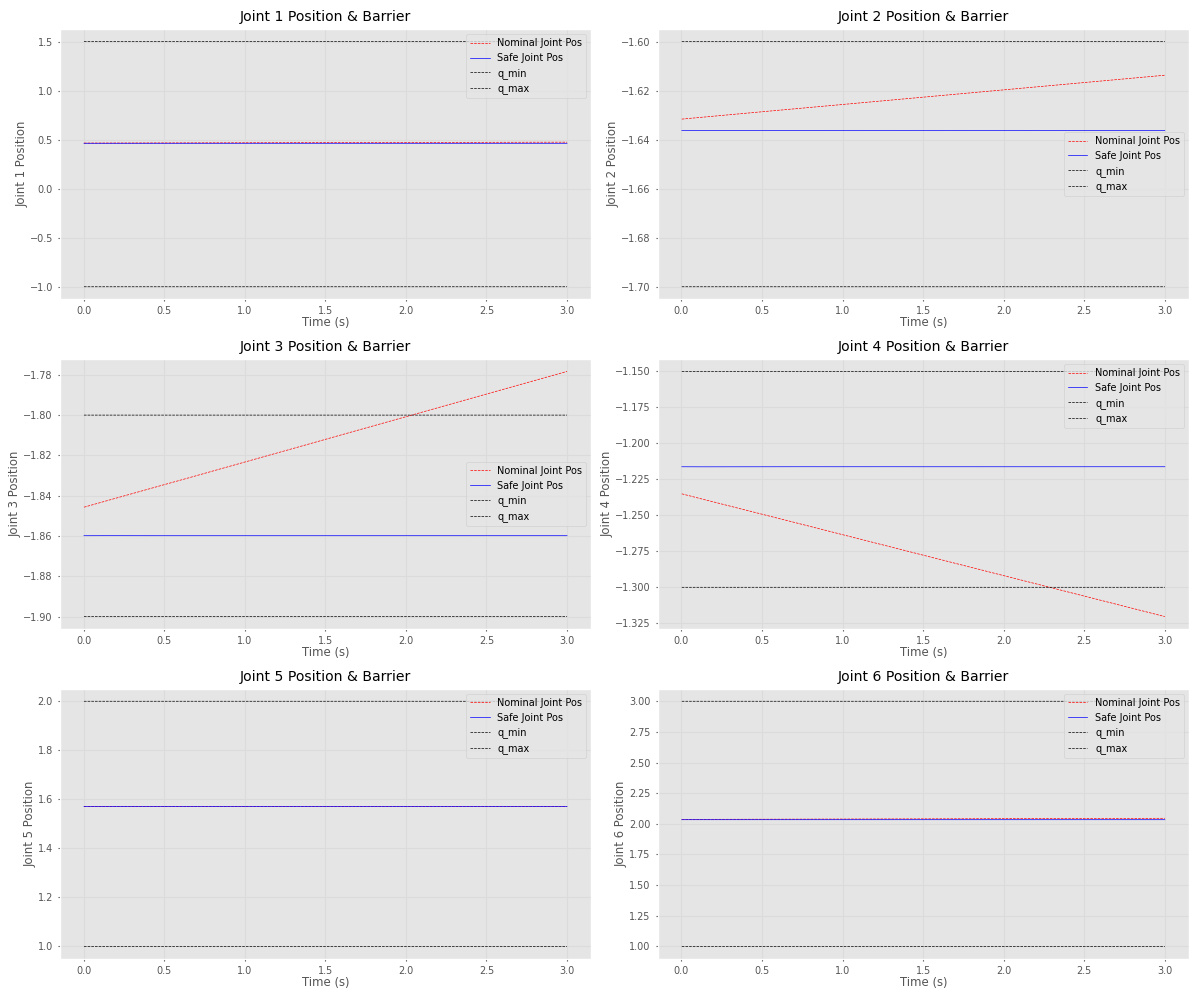

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

time = np.array(time_log)
n_joints = 6

plt.figure(figsize=(12, 10))
for i in range(n_joints):
    plt.subplot(3, 2, i+1)
    
    # Plot the nominal and safe joint positions
    plt.plot(time, q_nom_log[:, i], 'r--', label='Nominal Joint Pos')
    plt.plot(time, q_log[:, i], 'b-', label='Safe Joint Pos')
    
    # Plot the barrier function h = q - q_min
    #plt.plot(time, h_log[:, i], 'g-', label='Barrier h (q - q_min)')
    
    # Plot horizontal lines for q_min and q_max
    # (Here we replicate them at every time step to make a line across the plot)
    plt.plot(time, np.full_like(time, q_min[i]), 'k--', label='q_min')
    plt.plot(time, np.full_like(time, q_max[i]), 'k--', label='q_max')
    
    plt.xlabel('Time (s)')
    plt.ylabel(f'Joint {i+1} Position')
    plt.legend()
    plt.title(f'Joint {i+1} Position & Barrier')
    
plt.tight_layout()
plt.show()
# Joint limits in joint space
#q_min = np.full(6, -2*np.pi/2)  # rad
#q_max = np.full(6,  2*np.pi/2) 
#q_min = np.array([1.5, -1.6, -1.8, -1.15, 2.0, 3.0]) 
#q_max =  np.array([-1, -1.7, -1.9, -1.3, 1.0, 1.0])

# Admittance following trajectory with tau_min,max

In [17]:
import numpy as np
import mujoco
from cvxopt import matrix, solvers
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

solvers.options['show_progress'] = False

M_diag = np.array([50.0, 50.0, 50.0, 50.0, 50.0, 50.0])  # Mass matrix 
D_diag = np.array([100, 100, 100, 100, 100, 100])            # Damping matrix
K_diag = np.array([100, 100, 100, 100, 100, 100])             # Stiffness 
D = np.diag(D_diag)
K = np.diag(K_diag)
M = np.diag(M_diag)
''' Critical Damping - doesnt seem as good
omega_n = 1.0  # Natural frequency (rad/s)
# For translation (first 3 components):
K_trans = M_diag[0]       # e.g. 50*1 = 50
D_trans = 2 * M_diag[0] * omega_n         # e.g. 2*50*1 = 100
# For rotation (last 3 components): (keeping orientation constant)
K_rot = M_diag[3]           # e.g. 12*1 = 12
D_rot = 2 * M_diag[3] * omega_n           # e.g. 2*12*1 = 24

# Assemble effective gain matrices (6x6 diagonal)
K = np.diag([K_trans, K_trans, K_trans, K_rot, K_rot, K_rot])
D = np.diag([D_trans, D_trans, D_trans, D_rot, D_rot, D_rot])
'''
MAX_TORQUE = np.array([0.3, -34.0, -34.0, -8.0, 0.1, 0.05]) 
MIN_TORQUE =  np.array([-1, -40.0, -38.0, -10.0, -0.3, -0.05])
#MAX_TORQUE = np.array([300.0, 340.0, 340.0, 800.0, 1800.0, 1800.0]) 
#MIN_TORQUE =  -MAX_TORQUE

time_log = []
force_log = []  
duration = 5      
framerate = 30      
stepsize = ur5e.m.opt.timestep  
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# Logging arrays
frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 6))
torques = np.zeros((n_steps, 6))        
tau_nom_log = np.zeros((n_steps, 6))
h_log = np.zeros((n_steps, 6))
q_log = np.zeros((n_steps, 6))
target_positions_as_quat = np.zeros((n_steps, 7))
target_positions = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
contact_points = []
contact_forces = []
tau_cbf_log = np.zeros((n_steps, 6))

trajectory_amplitude = 0.04
trajectory_frequency = 0.1
z_velocity = -0.55  # Constant downward velocity
p = np.zeros((n_steps, 6))
dp = np.zeros((n_steps, 6))
ddp = np.zeros((n_steps, 6))
error_in_base_frame_log = np.zeros((n_steps,6))


for i in range(n_steps):
    t = i * stepsize
    p[i, 0] = trajectory_amplitude * np.sin(2 * np.pi * trajectory_frequency * t)  # X motion
    #desired_euler = np.array([np.pi, np.pi/2, np.pi/4])  # [roll, pitch, yaw]
    #R_des = R.from_euler('xyz', desired_euler).as_matrix()
    dp[i, 0] = trajectory_amplitude * 2 * np.pi * trajectory_frequency * np.cos(2 * np.pi * trajectory_frequency * t)
    ddp[i, 0] = -trajectory_amplitude * (2 * np.pi * trajectory_frequency) ** 2 * np.sin(2 * np.pi * trajectory_frequency * t)
    
    p[i, 2] = z_velocity * t  # Downward motion in Z
    dp[i, 2] = z_velocity
    ddp[i, 2] = 0  # Constant velocity in Z
    #p[i,3] = np.pi
    #p[i,4] = np.pi/2
    #p[i, 5] = np.pi/4

mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0
gamma = 1.0
#L_f_upper = np.zeros((6,))
#L_g_upper = -np.eye(6)
#L_f_lower = np.zeros((6,))
#L_g_lower = np.eye(6)
tau_prev = np.zeros(6)
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Cartesian kin
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    R_act = tcp_pos.R
    J = ur5e.jacob0(ur5e.d.qpos)
    dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)
    
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]

    f_ext *= 1.0
    
    # cart space
    target_pose = p[idx]
    actual_trans = tcp_pos.t
    #R_act = tcp_pos.R
    #R_err = R_des.T @ R_act
    #error_rot = R.from_matrix(R_err).as_rotvec()
    error_in_base_frame = target_pose - np.concatenate([tcp_pos.t, tcp_pos.rpy(order='xyz')])
    #error = target_pose - [tcp_pos.t, tcp_pos.rpy(order='xyz')]
    #error_in_base_frame = np.concatenate(error)
    error_in_base_frame_log[idx,:] = error_in_base_frame
    v_e = J @ ur5e.d.qvel
    
    # Admittance control
    acc_e = np.linalg.inv(M) @ (-D @ (v_e - dp[idx]) - K @ error_in_base_frame + ddp[idx])
    
    # nominal joint torques via inverse dynamics.
    tau = J.T @ (M @ acc_e + D @ (dp[idx] - v_e) + K @ error_in_base_frame)
    mass_matrix = np.zeros((ur5e.m.nv, ur5e.m.nv))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces
    tau_nom = tau.copy()  # nominal torque command
    tau_nom_log[idx, :] = tau_nom.copy()
    ''' Normal QP CBF
    #    We solve:
    #       minimize   0.5 * ||τ - τ_nom||²
    #       subject to  MIN_TORQUE <= τ <= MAX_TORQUE.
    P = matrix(np.eye(6))
    q_vec = matrix(-tau_nom)
    # Stack constraints: τ <= MAX_TORQUE and -τ <= -MIN_TORQUE.
    G = matrix(np.vstack((np.eye(6), -np.eye(6))))
    h_vec = matrix(np.hstack((MAX_TORQUE, -MIN_TORQUE)))
    sol_qp = solvers.qp(P, q_vec, G, h_vec)
    tau_safe = np.array(sol_qp['x']).flatten()
    '''
    # CBF
    '''
    h = gamma - np.linalg.norm(error_in_base_frame[:3]) 
    Lf_h = -error_in_base_frame[:3].T @ v_e[:3] / (np.linalg.norm(error_in_base_frame[:3]))  # Drift term

    # Compute Lg_h: influence of torques on the barrier function
    e_dir = error_in_base_frame[:3] / (np.linalg.norm(error_in_base_frame[:3]))  # unit vector along error
    Lg_h = J[:3, :].T @ e_dir  # (6,) shape, maps torque to change in h

    # Reform to (1,6) matrix for stacking into QP
    A_cbf = Lg_h.reshape(1, 6)  # (1,6)
    cbf_rhs = -Lf_h - gamma * h  # scalar

    G_box = np.vstack((np.eye(6), -np.eye(6))) 
    h_box = np.hstack((MAX_TORQUE, -MIN_TORQUE)) 

    # --- Stack CBF constraint ---
    G_qp = np.vstack((G_box, -A_cbf)) 
    h_qp = np.hstack((h_box, -cbf_rhs)) 

    P = matrix(np.eye(6), tc='d')
    q_vec = matrix(-tau_nom, tc='d')
    G = matrix(G_qp.astype(np.double))
    h_vec = matrix(h_qp.astype(np.double))
    sol_qp = solvers.qp(P, q_vec, G, h_vec)
    tau_safe = np.array(sol_qp['x']).flatten()
    '''
    u_nom = tau.copy() 
    tau_nom_log[idx, :] = u_nom.copy()

    h = gamma - np.linalg.norm(error_in_base_frame[:6]) 
    Lf_h = -error_in_base_frame[:6].T @ v_e * h 

    e_dir = error_in_base_frame[:6] * h  # Bruges til Lg_h
    Lg_h = J.T @ e_dir  # L_g h ∈ ℝ^{6}

    alpha_h = gamma * h  # α h term (exponential class K function)

    # ---- Analytical closed-form CBF correction ----

    # Step 1: Clip u_nom into box constraints
    u_star = np.clip(u_nom, MIN_TORQUE, MAX_TORQUE)

    # Step 2: Check if CBF constraint is satisfied
    cbf_constraint = Lf_h + Lg_h @ u_star + alpha_h  # Scalar
    if cbf_constraint >= 0:
        #print("Now")
        # Compute CBF correction
        numer = -cbf_constraint
        denom = Lg_h @ Lg_h  # Scalar to avoid divide by zero
        correction = (numer / denom) * Lg_h  # CBF projection term
        u_star = u_star - correction
        # Step 3: Optional re-clip to box after correction
        u_star = np.clip(u_star, MIN_TORQUE, MAX_TORQUE)

    # --- Apply safe torque to robot ---
    tau_safe = u_star.copy()
    tau_cbf_log[idx, :] = tau_safe.copy()
    ur5e.d.ctrl[:] = tau_safe

    # --- Optional logging ---
    h_log[idx, :] = np.full(6, cbf_constraint)  # Log constraint margin
    
    # Log
    quat_e = r2q(tcp_pos.R)
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    velocities[idx] = v_e
    forces[idx] = M @ acc_e
    q_log[idx, :] = ur5e.d.qpos.copy()
    
    target_positions_as_quat[idx] = positions_as_quat[idx]
    target_positions[idx] = positions_as_rpy[idx]
    target_velocities[idx] = velocities[idx]
    time_log.append(ur5e.d.time)
    force_log.append(f_ext[:3])

    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()
print(cbf_constraint)
if showVideo:
    media.show_video(frames, fps=framerate)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|█████████▉| 9.972/10 [00:19<00:00,  1.96s/it]              /home/viktor/.local/lib/python3.10/site-packages/tqdm/std.py:639: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 10.000000000000009/10 [00:19<00:00,  1.97s/it]


-2087.077811492447


# Plots

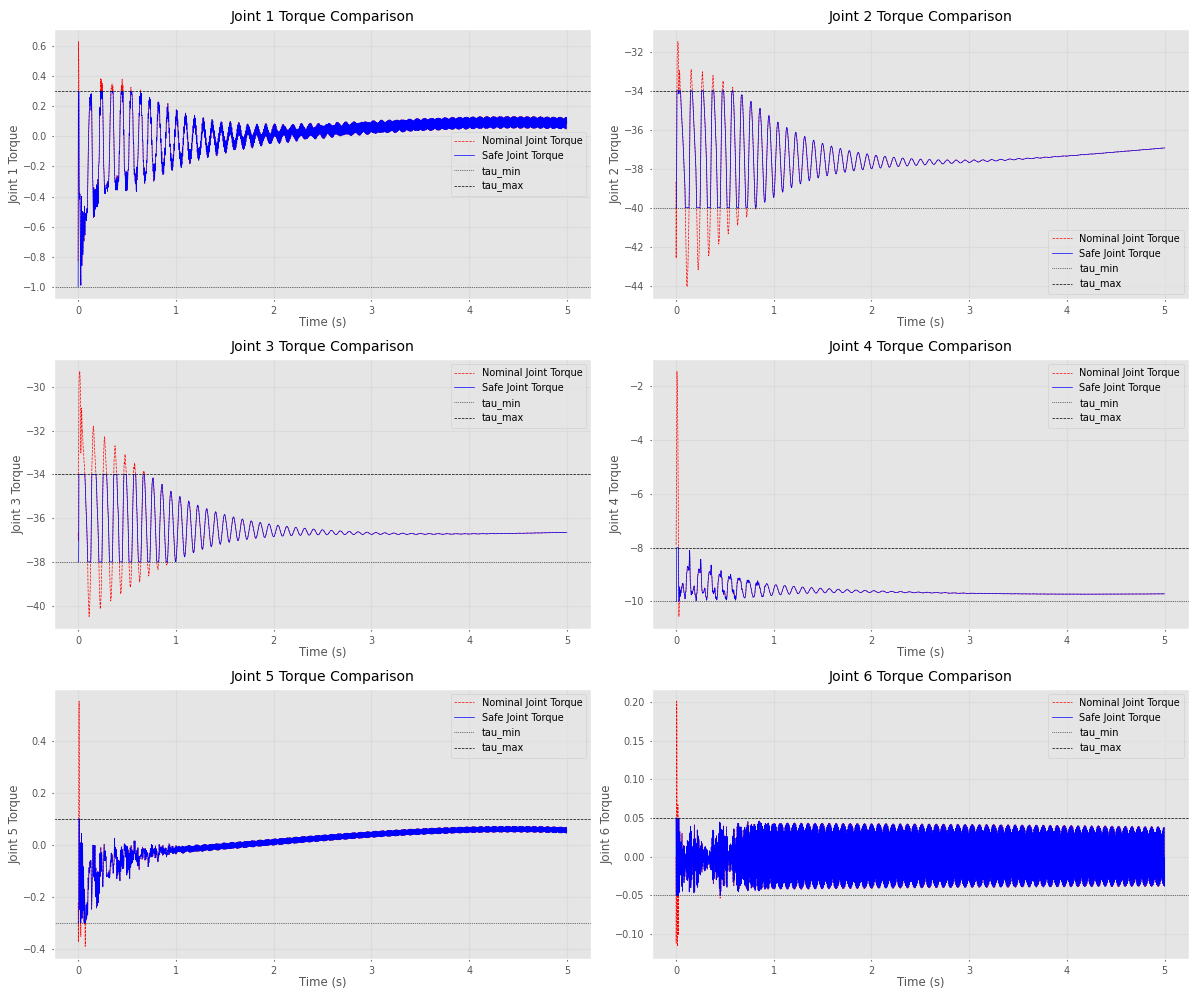

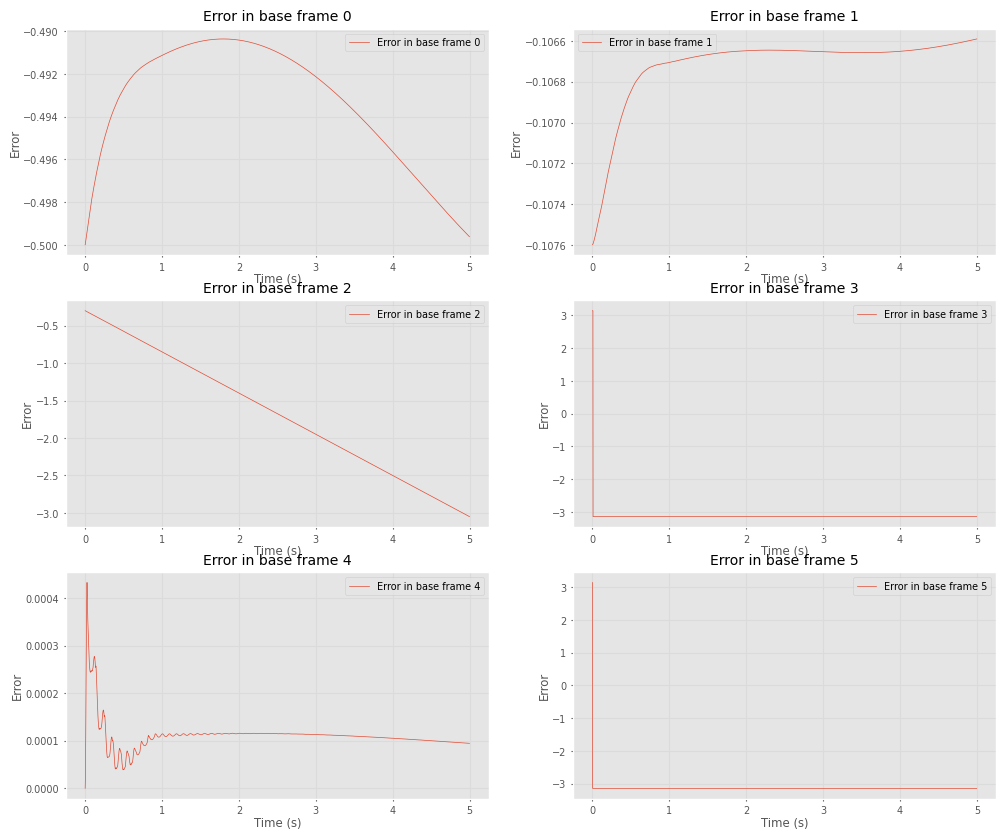

In [12]:
time = np.array(time_log)
n_joints = 6

plt.figure(figsize=(12, 10))
for i in range(n_joints):
    plt.subplot(3, 2, i+1)
    
    # Plot the nominal and safe joint velocities
    plt.plot(time, tau_nom_log[:, i], 'r--', label='Nominal Joint Torque')
    plt.plot(time, tau_cbf_log[:, i], 'b-', label='Safe Joint Torque')
    
    # Plot horizontal lines for vel_min and vel_max
    plt.axhline(MIN_TORQUE[i], color='k', linestyle=':', label='tau_min')
    plt.axhline(MAX_TORQUE[i], color='k', linestyle='--', label='tau_max')
    
    plt.xlabel('Time (s)')
    plt.ylabel(f'Joint {i+1} Torque')
    plt.legend()
    plt.title(f'Joint {i+1} Torque Comparison')

plt.tight_layout()
plt.show()

# Plot error_in_base_frame
plt.figure(figsize=(12, 10))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.plot(time, error_in_base_frame_log[:, i], label=f'Error in base frame {i}')
    plt.xlabel('Time (s)')
    plt.ylabel('Error')
    plt.legend()
    plt.title(f'Error in base frame {i}')

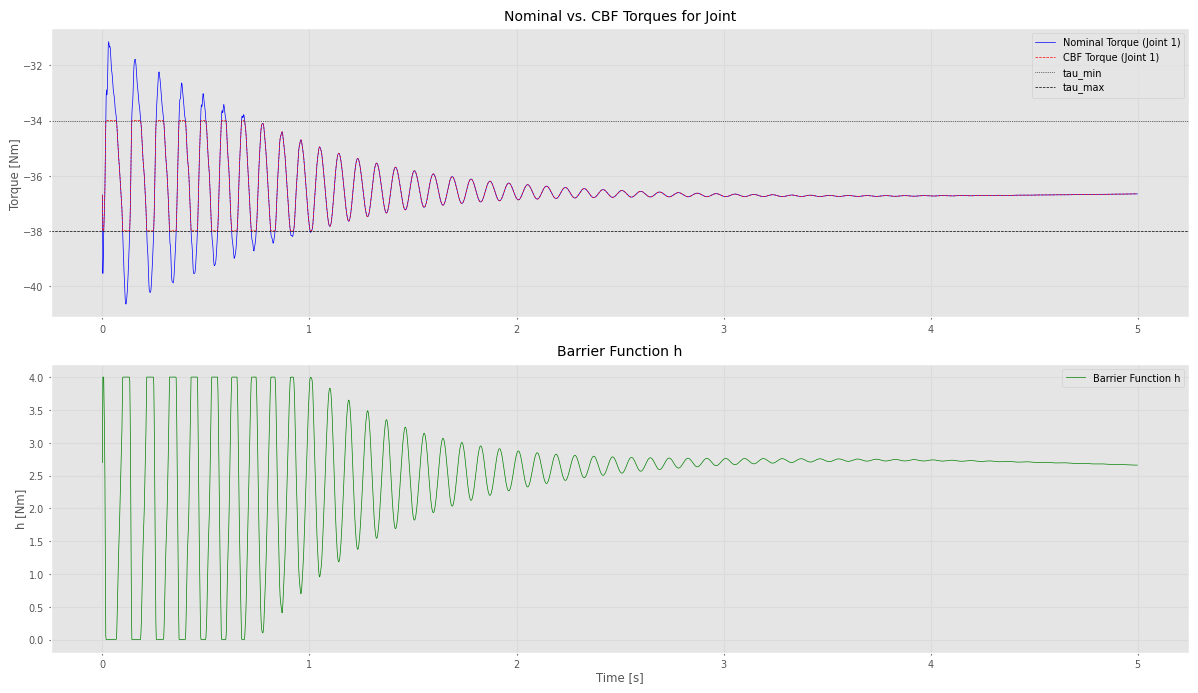

In [ ]:
time_array = np.array(time_log)

plt.figure(figsize=(12, 10))
joint = 2
# Plot nominal and CBF torques for Joint 1 (index 0)
plt.subplot(3, 1, 1)
plt.plot(time_array, tau_nom_log[:, joint], 'b-', label='Nominal Torque (Joint 1)')
plt.plot(time_array, tau_cbf_log[:, joint], 'r--', label='CBF Torque (Joint 1)')
plt.axhline(MAX_TORQUE[joint], color='k', linestyle=':', label='tau_min')
plt.axhline(MIN_TORQUE[joint], color='k', linestyle='--', label='tau_max')
plt.ylabel('Torque [Nm]')
plt.title('Nominal vs. CBF Torques for Joint')
plt.legend()
plt.grid(True)
#[-1, 1 + -40, -30 + -40, -30
# Plot the barrier function h for Joint 1: h = MAX_TORQUE - tau_cbf.
plt.subplot(3, 1, 2)
plt.plot(time_array, h_log[:, joint], 'g-', label='Barrier Function h')
plt.xlabel('Time [s]')
plt.ylabel('h [Nm]')
plt.title('Barrier Function h')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ECBF joint_pos following trajectory

In [13]:
import numpy as np
import mujoco
from cvxopt import matrix, solvers
from tqdm import tqdm
import matplotlib.pyplot as plt

solvers.options['show_progress'] = False

# ------------------------------------------------------------------
# Admittance Control Parameters for Trajectory Tracking
# ------------------------------------------------------------------
M_diag = np.array([50.0, 50.0, 50.0, 12.0, 12.0, 12.0])  # Cartesian mass matrix for admittance control
D_diag = np.array([50, 50, 50, 25, 25, 25])            # Damping matrix
K_diag = np.array([500, 500, 500, 250, 250, 250])             # Stiffness for trajectory tracking

M = np.diag(M_diag)
D = np.diag(D_diag)
K = np.diag(K_diag)

# (Torque constraints are no longer used so we omit MAX_TORQUE and MIN_TORQUE)

# ------------------------------------------------------------------
# Simulation and Logging Setup
# ------------------------------------------------------------------
time_log = []
force_log = []  
duration = 10        # seconds
framerate = 30      # Hz
stepsize = ur5e.m.opt.timestep  # Simulation time step (Δt)
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# Logging arrays
frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 6))
torques = np.zeros((n_steps, 6))        # safe torques (after QP)
tau_nom_log = np.zeros((n_steps, 6))      # nominal torques (before QP)
h_log = np.zeros((n_steps, 6))
q_log = np.zeros((n_steps, 6))
target_positions_as_quat = np.zeros((n_steps, 7))
target_positions = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
tau_cbf_log = np.zeros((n_steps, 6))
q_nom_log = np.zeros((n_steps, 6))    
q_dot_nom_log = np.zeros((n_steps, 6))

# ------------------------------------------------------------------
# Trajectory Definition (Sinusoidal in X and constant downward in Z)
# ------------------------------------------------------------------
'''
trajectory_amplitude = 0.04
trajectory_frequency = 0.1
z_velocity = -0.0  # Constant downward velocity
p = np.zeros((n_steps, 6))
dp = np.zeros((n_steps, 6))
ddp = np.zeros((n_steps, 6))

for i in range(n_steps):
    t = i * stepsize
    # Sinusoidal motion in X
    p[i, 0] = trajectory_amplitude * np.sin(2 * np.pi * trajectory_frequency * t)
    dp[i, 0] = trajectory_amplitude * 2 * np.pi * trajectory_frequency * np.cos(2 * np.pi * trajectory_frequency * t)
    ddp[i, 0] = -trajectory_amplitude * (2 * np.pi * trajectory_frequency) ** 2 * np.sin(2 * np.pi * trajectory_frequency * t)
    
    # Constant downward motion in Z
    p[i, 2] = z_velocity * t
    dp[i, 2] = z_velocity
    ddp[i, 2] = 0  # Zero acceleration in Z
'''
trajectory_amplitude = 0.14
trajectory_frequency = 0.1

# Initialize trajectory arrays for all 6 joints
p = np.zeros((n_steps, 6))
dp = np.zeros((n_steps, 6))
ddp = np.zeros((n_steps, 6))

# For each time step, compute the sine wave trajectory for each joint
for i in range(n_steps):
    t = i * stepsize
    for j in range(6):
        # Position: sine wave
        p[i, j] = trajectory_amplitude * np.sin(2 * np.pi * trajectory_frequency * t)
        # Velocity: derivative of sine is cosine scaled by (2πf)
        dp[i, j] = trajectory_amplitude * 2 * np.pi * trajectory_frequency * np.cos(2 * np.pi * trajectory_frequency * t)
        # Acceleration: derivative of cosine gives -sine scaled by (2πf)²
        ddp[i, j] = -trajectory_amplitude * (2 * np.pi * trajectory_frequency)**2 * np.sin(2 * np.pi * trajectory_frequency * t)

# ------------------------------------------------------------------
# Joint Position Limits for ECBF (Make sure these are defined appropriately)
# ------------------------------------------------------------------
# Note: Ensure that for each joint, q_min < q_max.
# The current values appear reversed; adjust if needed.
#q_min = np.array([1.5, -1.6, -1.8, -1.15, 2.0, 3.0]) 
#q_max = np.array([-1, -1.7, -1.9, -1.3, 1.0, 1.0]) 
#q_min = np.array([1.0, -1.0, 1.0, -0.1, 2.0, 3.0]) 
#q_max = np.array([0.1, -3.0, -3.0, -1.5, 1.0, 1.0])
q_min = np.full(6, -2*np.pi/2) # rad
q_max = np.full(6,  2*np.pi/2)            
print("q_min:", q_min)
print("q_max:", q_max)

# ------------------------------------------------------------------
# Pole Placement for ECBF Gains
# ------------------------------------------------------------------
# Desired barrier dynamics: s^2 + 2*zeta*omega_n s + omega_n^2
# For a critically damped response, choose zeta = 1.
omega_n = 4.0  # Natural frequency (rad/s)
zeta = 1.0     # Damping ratio (1 for critical damping)

# Compute ECBF gains from pole placement:
alpha_1 = omega_n ** 2       # α1 = ω_n^2
alpha_2 = 2 * zeta * omega_n # α2 = 2ζω_n
print(f"α1: {alpha_1}, α2: {alpha_2}")

# ------------------------------------------------------------------
# Initialize Simulation
# ------------------------------------------------------------------
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q  # Initialize joint positions (assumes sol.q is defined)
mujoco.mj_forward(ur5e.m, ur5e.d)

# Initialize nominal joint state variables for logging
q_nom = ur5e.d.qpos.copy()
q_dot_nom = ur5e.d.qvel.copy()

progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)

    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)

    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    f_ext *= 1.0  # Scaling if needed

    target_pose = p[idx]
    # Only consider translational error (orientation error set to zero)
    error_in_base_frame = target_pose - np.concatenate([tcp_pos.t, np.zeros(3)])
    # Compute current Cartesian velocity:
    v_e = J @ ur5e.d.qvel

    # Compute the desired Cartesian acceleration:
    acc_e = np.linalg.inv(M) @ (-D @ (v_e - dp[idx]) - K @ error_in_base_frame + ddp[idx])
    
    # Map Cartesian acceleration to joint space:
    acc_joint = np.linalg.pinv(J) @ (acc_e - dJ @ ur5e.d.qvel)
    # Update nominal joint velocities and positions (for logging)
    q_dot_nom += stepsize * acc_joint
    q_nom     += stepsize * q_dot_nom
    q_nom_log[idx, :] = q_nom.copy()
    q_dot_nom_log[idx, :] = q_dot_nom.copy()
    
    # ---------------------------
    # Compute Nominal Joint Torques via Inverse Dynamics
    # ---------------------------
    tau = J.T @ (M @ acc_e + D @ (dp[idx] - v_e) + K @ error_in_base_frame)
    mass_matrix = np.zeros((ur5e.m.nv, ur5e.m.nv))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces
    tau_nom = tau.copy()  # Nominal torque command from admittance control
    tau_nom_log[idx, :] = tau_nom.copy()
    
    # ------------------------------------------------------------------
    # Integrate Joint Position ECBF Constraints using Pole Placement
    # ------------------------------------------------------------------
    # Get current joint positions and velocities
    q_current = ur5e.d.qpos.copy()
    q_dot_current = ur5e.d.qvel.copy()

    # Compute the upper and lower bounds from the barrier function:
    # Upper bound: τ_i ≤ α1*(q_max - q_current) + α2*q_dot_current
    # Lower bound: τ_i ≥ -α1*(q_current - q_min) - α2*q_dot_current
    tau_upper_ecbf = alpha_1 * (q_max - q_current) + alpha_2 * q_dot_current
    tau_lower_ecbf = -alpha_1 * (q_current - q_min) - alpha_2 * q_dot_current

    # Set these as the constraints for the QP
    tau_upper_bound = tau_upper_ecbf
    tau_lower_bound = tau_lower_ecbf

    # Setup and solve the QP:
    #   minimize   0.5 * ||τ - τ_nom||²
    #   subject to τ_lower_bound ≤ τ ≤ τ_upper_bound
    P = matrix(np.eye(6))
    q_vec = matrix(-tau_nom)
    G = matrix(np.vstack((np.eye(6), -np.eye(6))))
    h_vec = matrix(np.hstack((tau_upper_bound, -tau_lower_bound)))
    sol_qp = solvers.qp(P, q_vec, G, h_vec)
    if sol_qp['status'] == 'optimal':
        tau_safe = np.array(sol_qp['x']).flatten()
    else:
        print("Failed")
        tau_safe = tau_nom  # Fall back to nominal if QP fails
    tau_cbf_log[idx, :] = tau_safe.copy()

    # Compute safety margin for logging (optional)
    margin_upper = tau_upper_bound - tau_safe
    margin_lower = tau_safe - tau_lower_bound
    margin = np.minimum(margin_upper, margin_lower)
    h_log[idx, :] = margin.copy()


    ur5e.d.ctrl[:] = tau_safe

    quat_e = r2q(tcp_pos.R)
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    velocities[idx] = v_e
    forces[idx] = M @ acc_e
    q_log[idx, :] = ur5e.d.qpos.copy()
    
    target_positions_as_quat[idx] = positions_as_quat[idx]
    target_positions[idx] = positions_as_rpy[idx]
    target_velocities[idx] = velocities[idx]
    time_log.append(ur5e.d.time)
    force_log.append(f_ext[:3])

    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    # Step the simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

if showVideo:
    media.show_video(frames, fps=framerate)


q_min: [-3.14159265 -3.14159265 -3.14159265 -3.14159265 -3.14159265 -3.14159265]
q_max: [3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265]
α1: 16.0, α2: 8.0


100%|█████████▉| 9.988000000000005/10 [00:26<00:00,  2.53s/it]  /home/viktor/.local/lib/python3.10/site-packages/tqdm/std.py:639: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 10.000000000000009/10 [00:26<00:00,  2.65s/it]


# Plots

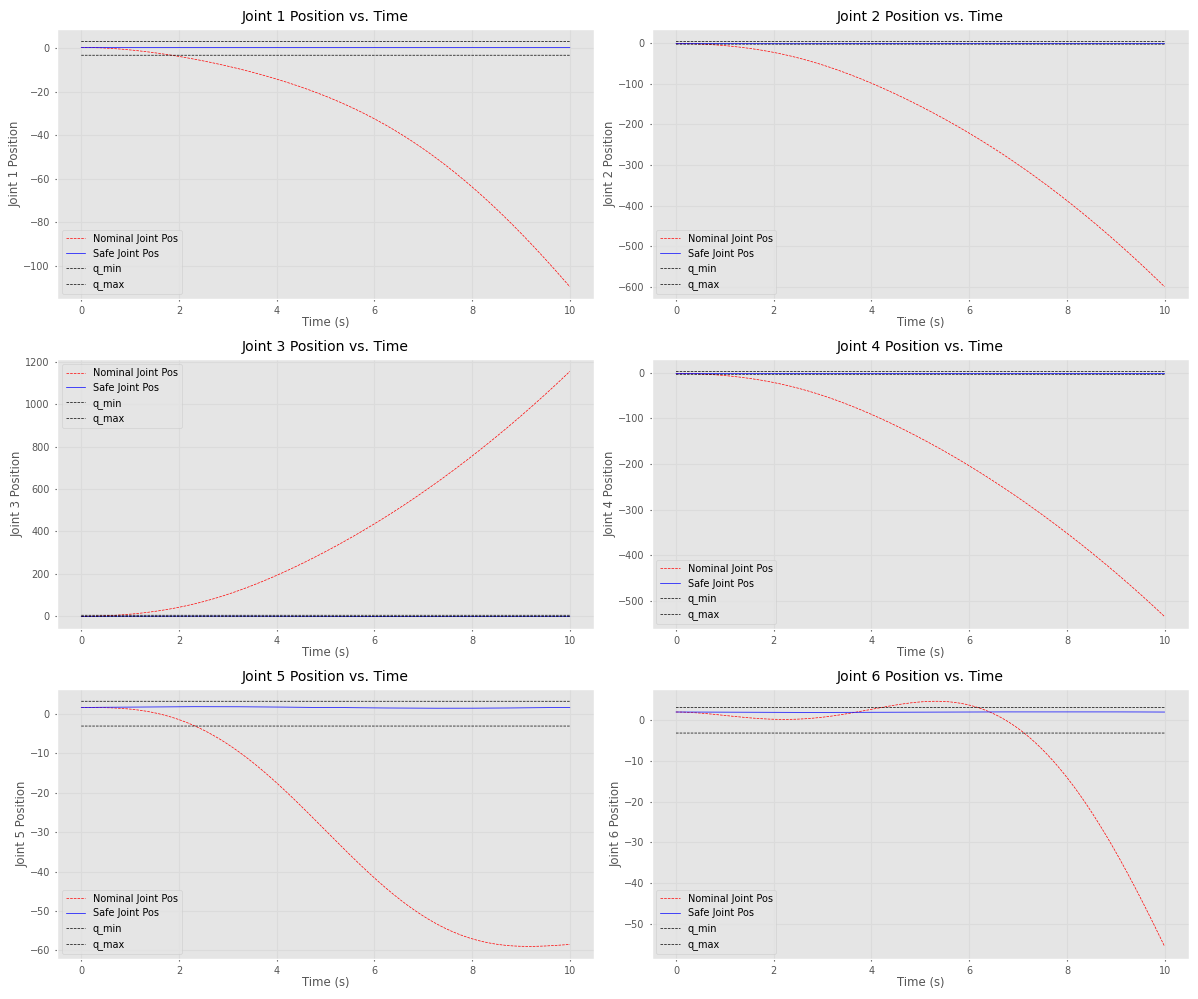

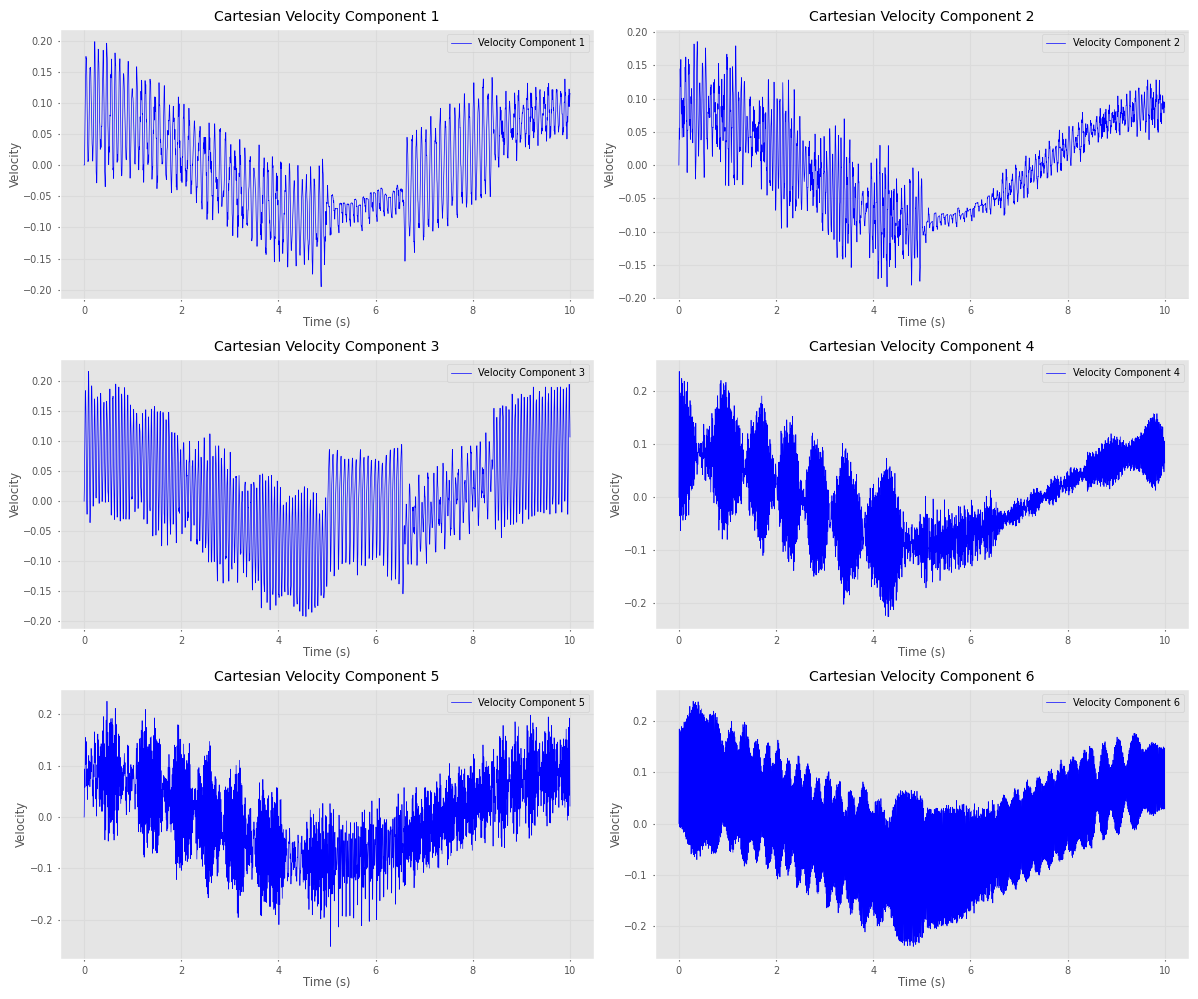

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the time_log list (logged during simulation) to a NumPy array for plotting
time = np.array(time_log)
n_joints = 6

plt.figure(figsize=(12, 10))

for i in range(n_joints):
    plt.subplot(3, 2, i+1)
    
    # Plot the nominal joint positions (before applying ECBF constraints)
    plt.plot(time, q_nom_log[:, i], 'r--', label='Nominal Joint Pos')
    # Plot the safe joint positions (after applying ECBF constraints)
    plt.plot(time, q_log[:, i], 'b-', label='Safe Joint Pos')
    
    # Plot horizontal lines indicating the joint limits q_min and q_max for joint i.
    # The joint limits are replicated across the time vector.
    plt.plot(time, np.full_like(time, q_min[i]), 'k--', label='q_min')
    plt.plot(time, np.full_like(time, q_max[i]), 'k--', label='q_max')
    
    plt.xlabel('Time (s)')
    plt.ylabel(f'Joint {i+1} Position')
    plt.title(f'Joint {i+1} Position vs. Time')
    plt.legend()

plt.tight_layout()
plt.show()

# Create a figure with 6 subplots (one per velocity component)
plt.figure(figsize=(12, 10))
n_vel = velocities.shape[1]
for i in range(n_vel):
    plt.subplot(3, 2, i+1)
    plt.plot(time, velocities[:, i], 'b-', label=f'Velocity Component {i+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity')
    plt.title(f'Cartesian Velocity Component {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()
#q_min = np.array([1.0, -1.0, 1.0, -1.0, 2.0, 3.0]) 
#q_max = np.array([0.1, -3.0, -3.0, -1.5, 1.0, 1.0])

# CBF torque_Min and torque_max
Ret god, men h er muligvis forkert og ingen alpha/gamma, L_f,g(x) 

In [15]:
import numpy as np
import mujoco
from cvxopt import matrix, solvers
from tqdm import tqdm
import matplotlib.pyplot as plt

solvers.options['show_progress'] = False

M_diag = np.array([5.0, 5.0, 5.0, 5.0, 5.0, 5.0])
D_diag = np.array([50, 50, 50, 10, 10, 10])
K_diag = np.array([100, 100, 100, 5, 5, 5])
M = np.diag(M_diag)
D = np.diag(D_diag)
K = np.diag(K_diag)

MAX_TORQUE = np.array([0.1, 30.0, 25.0, 28.0, 28.0, 28.0])
MIN_TORQUE = np.array([-1.0, 7.0, 3.0, -28.0, -28.0, -28.0])

compliance_vector = np.array([1, 1, 1, 1, 1, 1])

x_e = np.zeros(6)  # Cartesian position error
v_e = np.zeros(6)  # Cartesian velocity error
v_e_last = np.zeros(6)

showVideo = True
duration = 5  
framerate = 30  
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))

frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 3))

tau_nom_log = np.zeros((n_steps, 6))
tau_cbf_log = np.zeros((n_steps, 6))

h_log = np.zeros((n_steps, 6))
target_positions_as_quat = np.zeros((n_steps, 7))
target_positions = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
contact_points = []
contact_forces = []
time_log = []
force_log = []  

mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)

    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    f_ext *= compliance_vector
    
    # 3. Admittance Dynamics - cartesian acc
    acc_e = np.linalg.inv(M) @ (f_ext - K @ x_e - D @ v_e)
    
    # trapezoidal, maybe try euler
    v_e = v_e + stepsize * 0.5 * (acc_e + v_e_last)
    x_e = x_e + stepsize * 0.5 * (v_e + v_e_last)
    v_e_last = v_e.copy()
    
    # Map cartesian to joint acc
    acc_joint = np.linalg.pinv(J) @ (acc_e - dJ @ ur5e.d.qvel)
    
    # nominal joint torques with inv dyn
    prev_qacc = ur5e.d.qacc.copy()
    ur5e.d.qacc[:] = acc_joint
    mujoco.mj_inverse(ur5e.m, ur5e.d)
    tau_nom = ur5e.d.qfrc_inverse.copy()  
    ur5e.d.qacc[:] = prev_qacc
    tau_nom_log[idx, :] = tau_nom.copy()
    
    # 6. Safety Filtering: Enforce both maximum and minimum torque constraints using a QP.
    #    We solve for tau ∈ ℝ⁶:
    #         minimize   0.5 * ||tau - tau_nom||²
    #         subject to MIN_TORQUE[i] <= tau_i <= MAX_TORQUE[i] for each joint i.
    # Formulated as:
    #    G*tau <= h, where we stack:
    #         tau_i <= MAX_TORQUE[i]        →   I*tau <= MAX_TORQUE
    #         -tau_i <= -MIN_TORQUE[i]      →  -I*tau <= -MIN_TORQUE
    P = matrix(np.eye(6))
    q_vec = matrix(-tau_nom)
    G = matrix(np.vstack((np.eye(6), -np.eye(6))))
    h_vec = matrix(np.hstack((MAX_TORQUE, -MIN_TORQUE)))
    sol_qp = solvers.qp(P, q_vec, G, h_vec)
    tau_cbf = np.array(sol_qp['x']).flatten()
    tau_cbf_log[idx, :] = tau_cbf.copy()
    
    h_log[idx, :] = MAX_TORQUE - tau_cbf
    
    ur5e.d.ctrl[:] = tau_cbf

    quat_e = r2q(tcp_pos.R)
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    velocities[idx] = v_e
    forces[idx] = f_ext[:3]
    target_positions_as_quat[idx] = positions_as_quat[idx]
    target_positions[idx] = positions_as_rpy[idx]
    target_velocities[idx] = velocities[idx]
    time_log.append(ur5e.d.time)
    force_log.append(f_ext[:3])

    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

if showVideo:
    media.show_video(frames, fps=framerate)



  0%|          | 0/5 [00:00<?, ?it/s]

100%|█████████▉| 4.999999999999671/5 [00:13<00:00,  2.64s/it]  


# Plots

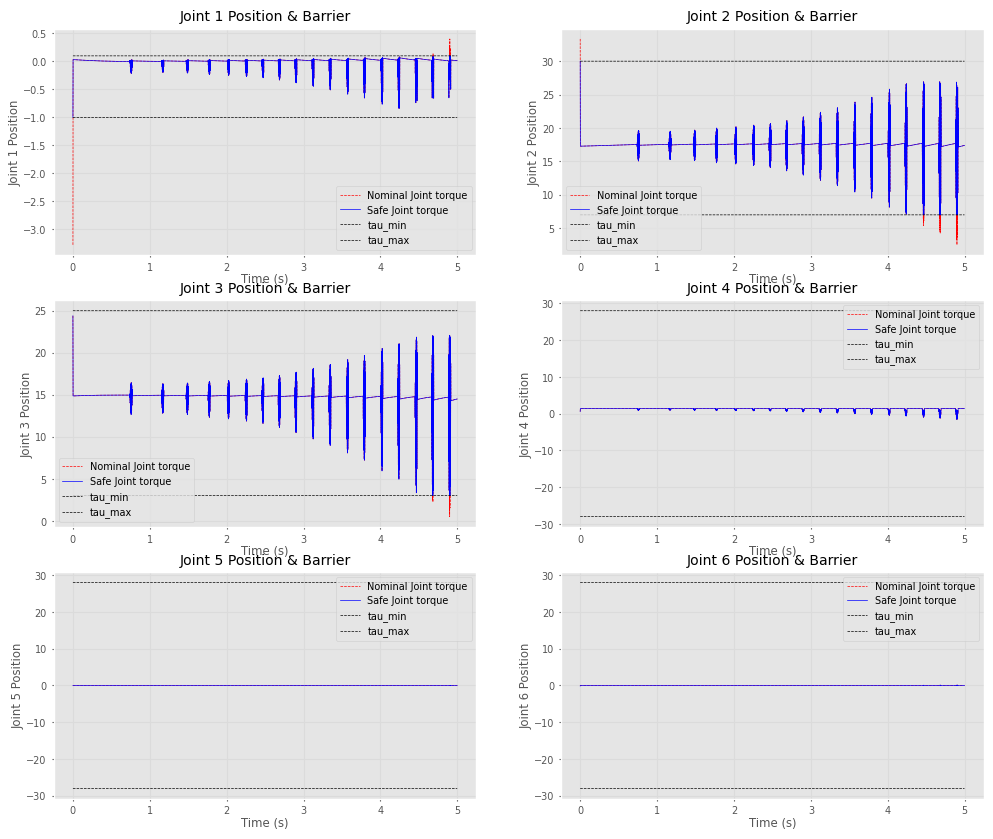

In [16]:
time = np.array(time_log)

plt.figure(figsize=(12, 10))
for i in range(n_joints):
    plt.subplot(3, 2, i+1)
    
    # Plot the nominal and safe joint positions
    plt.plot(time, tau_nom_log[:, i], 'r--', label='Nominal Joint torque')
    plt.plot(time, tau_cbf_log[:, i], 'b-', label='Safe Joint torque')
    
    # Plot the barrier function h = q - q_min
    #plt.plot(time, h_log[:, i], 'g-', label='Barrier h (q - q_min)')
    
    # Plot horizontal lines for q_min and q_max
    # (Here we replicate them at every time step to make a line across the plot)
    plt.plot(time, np.full_like(time, MIN_TORQUE[i]), 'k--', label='tau_min')
    plt.plot(time, np.full_like(time, MAX_TORQUE[i]), 'k--', label='tau_max')
    
    plt.xlabel('Time (s)')
    plt.ylabel(f'Joint {i+1} Position')
    plt.legend()
    plt.title(f'Joint {i+1} Position & Barrier')

# Admittance controller following trajectory
D=50,50,30,10,10,10

In [ ]:
import numpy as np
import mujoco
from tqdm import tqdm

# Define Admittance Control Matrices
M_diag = np.array([50.0, 50.0, 50.0, 12.0, 12.0, 12.0])  # Mass matrix for admittance control
#D_diag = np.array([100, 100, 100, 25.0, 25.0, 25.0])  # Damping matrix
#K_diag = np.array([50.0, 50.0, 50.0, 25.0, 25.0, 25.0])  # Stiffness for trajectory tracking
#D = np.diag(D_diag)
#K = np.diag(K_diag)
omega_n = 1.0  # Natural frequency (rad/s)
# For translation (first 3 components):
K_trans = M_diag[0]       # e.g. 50*1 = 50
D_trans = 2 * M_diag[0] * omega_n         # e.g. 2*50*1 = 100
# For rotation (last 3 components): (keeping orientation constant)
K_rot = M_diag[3]           # e.g. 12*1 = 12
D_rot = 2 * M_diag[3] * omega_n           # e.g. 2*12*1 = 24

# Assemble effective gain matrices (6x6 diagonal)
K = np.diag([K_trans, K_trans, K_trans, K_rot, K_rot, K_rot])
D = np.diag([D_trans, D_trans, D_trans, D_rot, D_rot, D_rot])
M = np.diag(M_diag)

#MAX_TORQUE = np.array([150.0, 150.0, 150.0, 28.0, 28.0, 28.0])
time_log = []
force_log = []  # to store the first 3 components of the external force
duration = 10  # seconds
framerate = 30  # Hz
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# Logging and video capture
frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 6))
torques = np.zeros((n_steps, 6))
target_positions_as_quat = np.zeros((n_steps, 7))
target_positions = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
contact_points = []
contact_forces = []
tau_log = np.zeros((n_steps, 6))
q_log = np.zeros((n_steps, 6))

# Generate a sinusoidal trajectory with downward motion
trajectory_amplitude = 0.14
trajectory_frequency = 0.1
#z_velocity = -0.55  # Constant downward velocity
# Initialize trajectory arrays for all 6 joints
p = np.zeros((n_steps, 6))
dp = np.zeros((n_steps, 6))
ddp = np.zeros((n_steps, 6))

# For each time step, compute the sine wave trajectory for each joint
for i in range(n_steps):
    t = i * stepsize
    for j in range(6):
        # Position: sine wave
        p[i, j] = trajectory_amplitude * np.sin(2 * np.pi * trajectory_frequency * t)
        # Velocity: derivative of sine is cosine scaled by (2πf)
        dp[i, j] = trajectory_amplitude * 2 * np.pi * trajectory_frequency * np.cos(2 * np.pi * trajectory_frequency * t)
        # Acceleration: derivative of cosine gives -sine scaled by (2πf)²
        ddp[i, j] = -trajectory_amplitude * (2 * np.pi * trajectory_frequency)**2 * np.sin(2 * np.pi * trajectory_frequency * t)

# Reset MuJoCo Simulation
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Get Cartesian position and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)

    # Get force at the end effector
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    
    # Apply compliance selection
    f_ext *= compliance_vector
    
    # Compute trajectory error
    target_pose = p[idx]
    current_orient = tcp_pos.rpy(order='xyz')
    error_in_base_frame = target_pose - np.concatenate([tcp_pos.t, current_orient])
    v_e = J @ ur5e.d.qvel
    
    # Admittance control: Compute desired acceleration
    acc_e = np.linalg.inv(M) @ (f_ext - D @ (v_e - dp[idx]) - K @ error_in_base_frame + ddp[idx])
    
    # Compute joint torques
    tau = J.T @ (M @ acc_e + D @ (dp[idx] - v_e) + K @ error_in_base_frame)
    mass_matrix = np.zeros((ur5e.m.nv, ur5e.m.nv))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces
    tau_log[idx, :] = tau.copy()
    # Clamp torques
    #tau = np.clip(tau, -MAX_TORQUE, MAX_TORQUE)
    
    # Apply torque control
    ur5e.d.ctrl[:] = tau
    
    # Log data
    quat_e = r2q(tcp_pos.R)
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate([tcp_pos.t, tcp_pos.rpy(order='xyz')])
    velocities[idx] = v_e
    forces[idx] = M @ acc_e
    torques[idx] = tau
    target_positions_as_quat[idx] = positions_as_quat[idx]
    target_positions[idx] = positions_as_rpy[idx]
    target_velocities[idx] = velocities[idx]
    time_log.append(ur5e.d.time)
    force_log.append(f_ext[:3])
    q_log[idx, :] = ur5e.d.qpos.copy()
    
    # Capture video frames
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        #print(pixels.shape, pixels.dtype)
        frames.append(pixels)
    
    # Step simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

# Show video
if showVideo:
    media.show_video(frames, fps=framerate)


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10.000000000000009/10 [00:15<00:00,  1.58s/it] 


# Plots

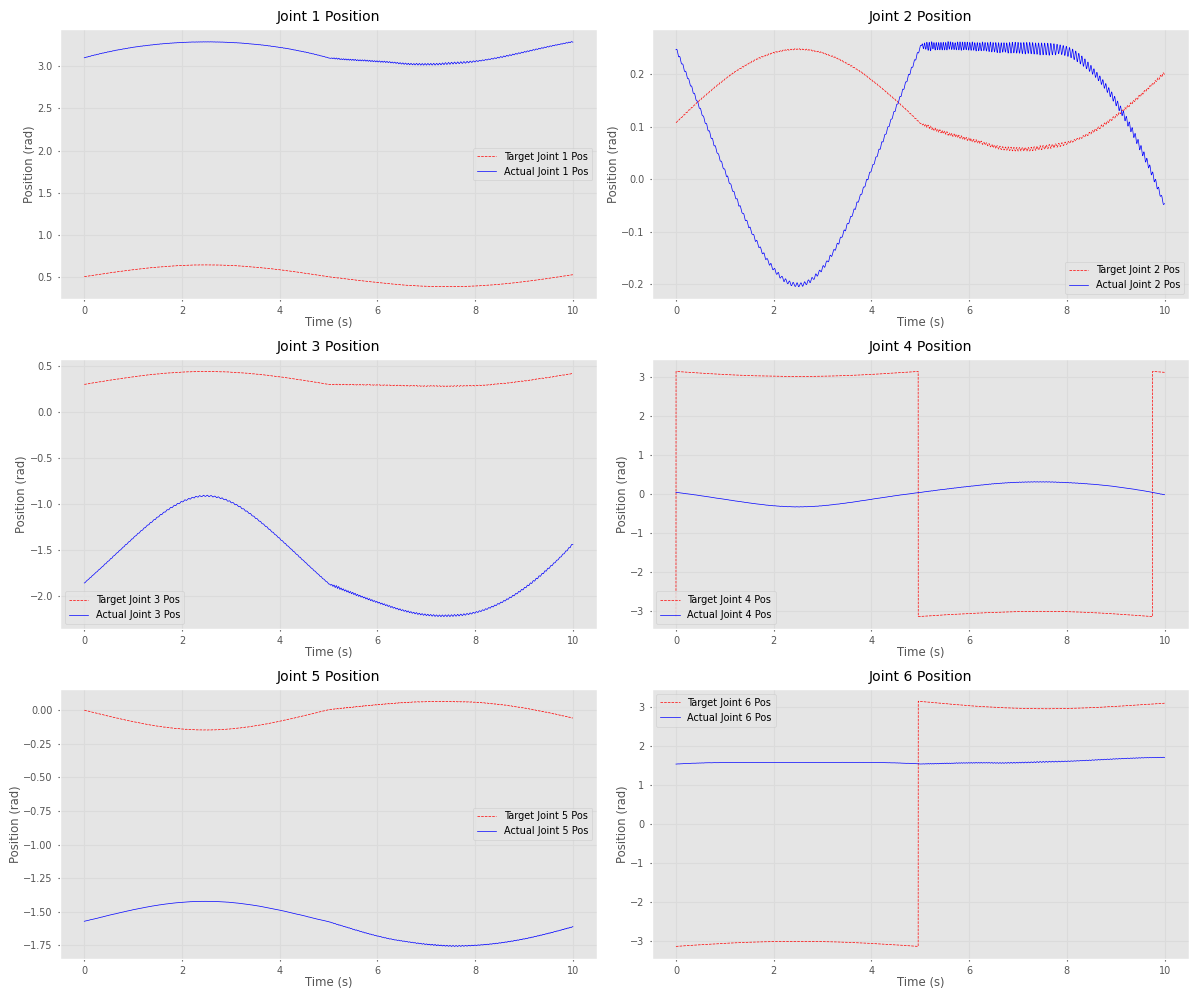

ValueError: x and y must have same first dimension, but have shapes (5000,) and (1500,)

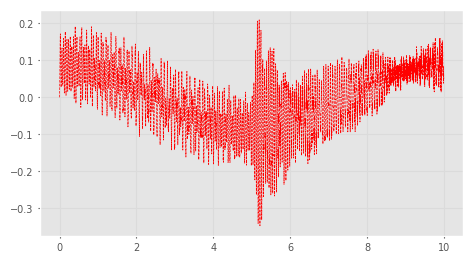

In [ ]:
# -----------------------------------------------------------------------------
# Plot Target vs. Actual Joint Positions
# -----------------------------------------------------------------------------
time_arr = np.array(time_log)
plt.figure(figsize=(12, 10))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.plot(time_arr, target_positions[:, i], 'r--', label=f'Target Joint {i+1} Pos')
    plt.plot(time_arr, q_log[:, i], 'b-', label=f'Actual Joint {i+1} Pos')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (rad)')
    plt.title(f'Joint {i+1} Position')
    plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Plot Target vs. Actual Joint Velocities
# -----------------------------------------------------------------------------
plt.figure(figsize=(12, 10))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.plot(time_arr, target_velocities[:, i], 'r--', label=f'Target Joint {i+1} Vel')
    plt.plot(time_arr, q_dot_log[:, i], 'b-', label=f'Actual Joint {i+1} Vel')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (rad/s)')
    plt.title(f'Joint {i+1} Velocity')
    plt.legend()
plt.tight_layout()
plt.show()

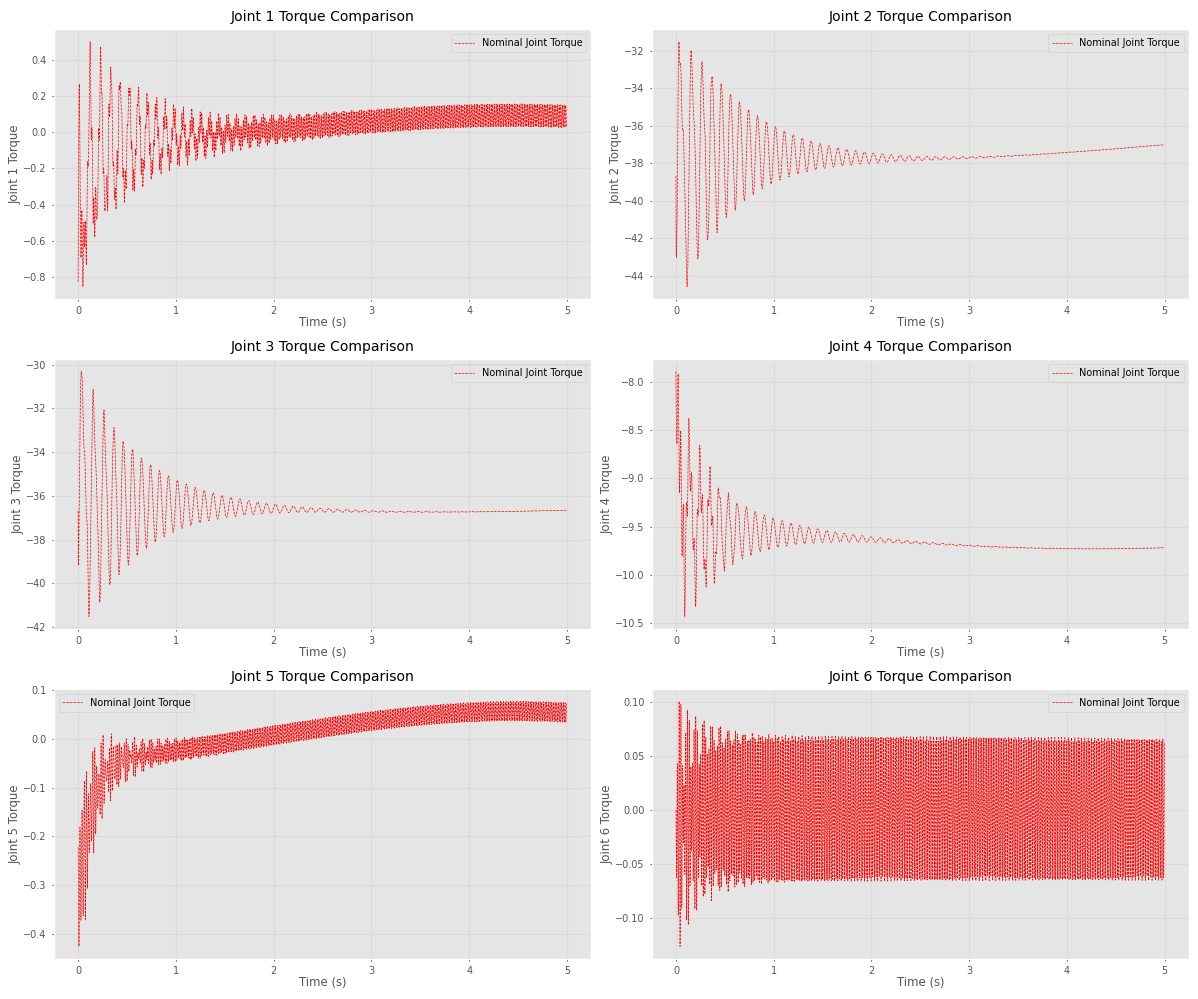

In [ ]:
time = np.array(time_log)
n_joints = 6

plt.figure(figsize=(12, 10))
for i in range(n_joints):
    plt.subplot(3, 2, i+1)
    
    # Plot the nominal and safe joint velocities
    plt.plot(time, tau_log[:, i], 'r--', label='Nominal Joint Torque')
    
    plt.xlabel('Time (s)')
    plt.ylabel(f'Joint {i+1} Torque')
    plt.legend()
    plt.title(f'Joint {i+1} Torque Comparison')

plt.tight_layout()
plt.show()

# Admittance controller no trac tau_max

In [ ]:
import numpy as np
import mujoco
from cvxopt import matrix, solvers
from tqdm import tqdm
import matplotlib.pyplot as plt

solvers.options['show_progress'] = False
M_diag = np.array([5.0, 5.0, 5.0, 5.0, 5.0, 5.0])
D_diag = np.array([50, 50, 50, 10, 10, 10])
K_diag = np.array([100, 100, 100, 5, 5, 5])
M = np.diag(M_diag)
D = np.diag(D_diag)
K = np.diag(K_diag)

MAX_TORQUE = np.array([150.0, 30.0, 25.0, 28.0, 28.0, 28.0])

compliance_vector = np.array([1, 1, 1, 1, 1, 1])

x_e = np.zeros(6)  # Cartesian position error
v_e = np.zeros(6)  # Cartesian velocity error
v_e_last = np.zeros(6)

showVideo = True
duration = 5  # seconds
framerate = 30  # Hz
stepsize = ur5e.m.opt.timestep  
n_steps = int(np.ceil(duration / stepsize))


frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 3))
tau_nom_log = np.zeros((n_steps, 6))
tau_safe_log = np.zeros((n_steps, 6))
# And we log the barrier function h = MAX_TORQUE - tau_safe:
h_log = np.zeros((n_steps, 6))
target_positions_as_quat = np.zeros((n_steps, 7))
target_positions = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
contact_points = []
contact_forces = []
time_log = []
force_log = []  # log external force (first 3 components)

mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # 1. cartesian kinematics
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)
    
    # 2. external force at end-effector
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    f_ext *= compliance_vector
    
    # 3. admittance Dynamics - get desired cartesian acceleration.
    acc_e = np.linalg.inv(M) @ (f_ext - K @ x_e - D @ v_e)
    
    # trapezoidal integration, maybe switch to euler
    v_e = v_e + stepsize * 0.5 * (acc_e + v_e_last)
    x_e = x_e + stepsize * 0.5 * (v_e + v_e_last)
    v_e_last = v_e.copy()
    
    # 4. cartesian to joint acc
    acc_joint = np.linalg.pinv(J) @ (acc_e - dJ @ ur5e.d.qvel)
    
    # 5. get nominal joint torques via inverse dynamics.
    prev_qacc = ur5e.d.qacc.copy()
    ur5e.d.qacc[:] = acc_joint
    mujoco.mj_inverse(ur5e.m, ur5e.d)
    tau_nom = ur5e.d.qfrc_inverse.copy()  # nominal torque command
    ur5e.d.qacc[:] = prev_qacc
    
    # Log the nominal torques
    tau_nom_log[idx, :] = tau_nom.copy()
    
    # 6. Safety Filtering: Enforce maximum torque constraint using a QP.
    # We solve for tau ∈ ℝ⁶:
    #    minimize   0.5 * ||tau - tau_nom||²
    #    subject to tau_i <= MAX_TORQUE[i] for each joint i.
    # This QP is formulated over the full 6D torque vector.
    P = matrix(np.eye(6))
    q_vec = matrix(-tau_nom)
    # The constraints: tau_i <= MAX_TORQUE[i]  ⟺  I * tau <= MAX_TORQUE.
    G = matrix(np.eye(6))
    h_vec = matrix(MAX_TORQUE)
    sol_qp = solvers.qp(P, q_vec, G, h_vec)
    tau_safe = np.array(sol_qp['x']).flatten()
    tau_safe_log[idx, :] = tau_safe.copy()
    
    # barrier function
    # h = tau_max - tau_safe = 0 at boundary
    h_log[idx, :] = MAX_TORQUE - tau_safe
    
    ur5e.d.ctrl[:] = tau_safe
    
    # Log
    quat_e = r2q(tcp_pos.R)
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    velocities[idx] = v_e
    forces[idx] = f_ext[:3]
    target_positions_as_quat[idx] = positions_as_quat[idx]
    target_positions[idx] = positions_as_rpy[idx]
    target_velocities[idx] = velocities[idx]
    time_log.append(ur5e.d.time)
    force_log.append(f_ext[:3])
    
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

# Optionally display video
if showVideo:
    media.show_video(frames, fps=framerate)

# -------------------------------


100%|█████████▉| 4.999999999999671/5 [00:10<00:00,  2.13s/it]  


# Plots

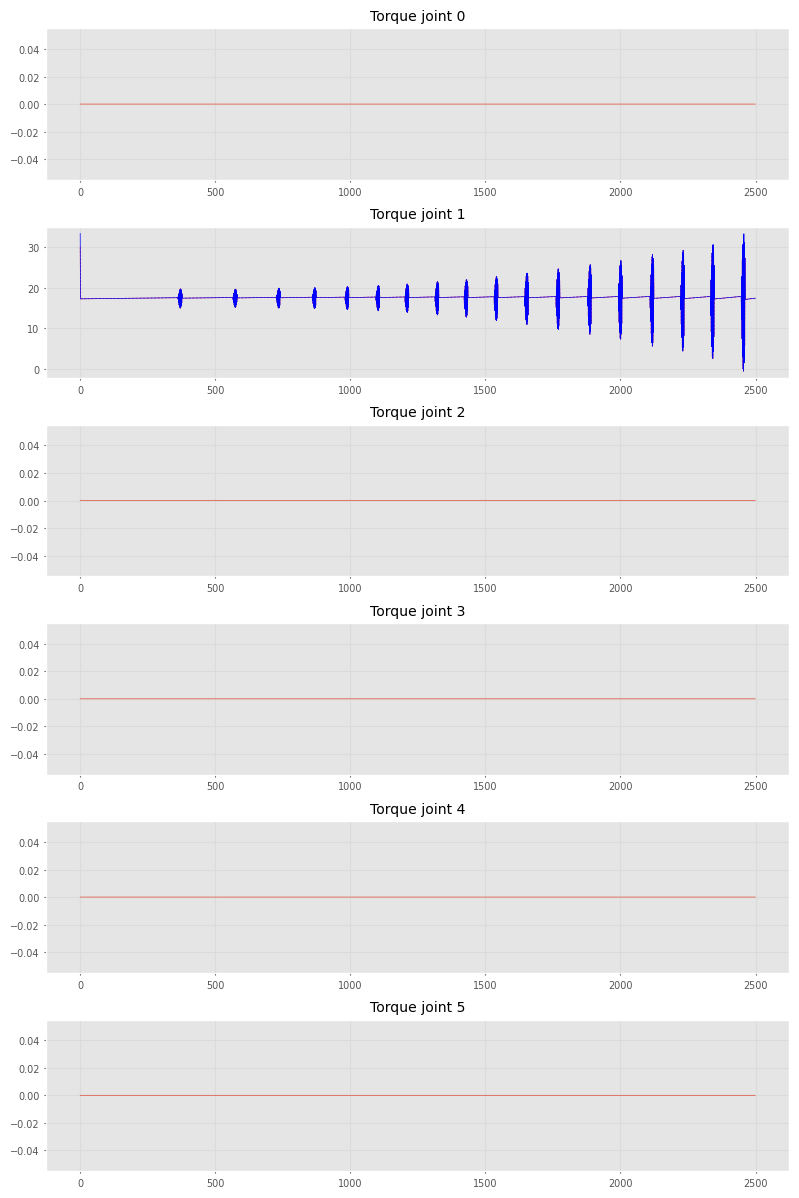

In [ ]:

fig, axs = plt.subplots(6, 1, figsize=(8, 12))
# Plot the nominal and safe joint velocities
# plt.plot(time, q_dot_nom_log[:, i], 'r--', label='Nominal Joint Vel')
# plt.plot(time, q_dot_log[:, i], 'b-', label='Safe Joint Vel')
    
# Plot horizontal lines for vel_min and vel_max
# plt.axhline(vel_min, color='k', linestyle=':', label='vel_min')
# plt.axhline(vel_max, color='k', linestyle='--', label='vel_max')
axs[0].plot(torques[:,0])
axs[0].set_title('Torque joint 0')

axs[1].plot(tau_safe_log[:,1], 'r--', label='Nominal Joint Vel')
axs[1].plot(tau_nom_log[:,1], 'b-', label='Safe Joint Vel')
#plt.axhline(MAX_TORQUE, color='k', linestyle='--', label='vel_max')
axs[1].set_title('Torque joint 1')

axs[2].plot(torques[:,2])
axs[2].set_title('Torque joint 2')

axs[3].plot(torques[:,3])
axs[3].set_title('Torque joint 3')

axs[4].plot(torques[:,4])
axs[4].set_title('Torque joint 4')

axs[5].plot(torques[:,5])
axs[5].set_title('Torque joint 5')

plt.tight_layout()
plt.show()



# Admittance simulation impulse check (aflevering 3)

100%|█████████▉| 24.999999999997023/25 [00:42<00:00,  1.71s/it] 
